In [2]:
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv(r'/Users/aviral/Documents/programming/datas/fakenews.csv')
data.head()

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


In [4]:
import string
from nltk.corpus import stopwords
from nltk.stem   import WordNetLemmatizer
from nltk.tokenize import word_tokenize

def clean_text(text):
    text =''.join([i for i in text if i not in string.punctuation and i not in string.digits])
    tokens = word_tokenize(text, 'english')
    lemmatiser = WordNetLemmatizer()
    lemmatized = [lemmatiser.lemmatize(word) for word in tokens]
    sw = stopwords.words('english')
    stopped = [word for word in lemmatized if word.lower() not in sw]
    return stopped

In [5]:
x = data['title']
y = data['label']

In [6]:
from sklearn.model_selection import train_test_split

train_x,test_x,train_y,test_y = train_test_split(x,y,random_state=1,train_size=0.7)

In [7]:
from sklearn.feature_extraction.text import CountVectorizer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

train_x = train_x.fillna('')
test_x = test_x.fillna('')

bow_transformer = CountVectorizer(analyzer=clean_text).fit(train_x)

text_bow_train = bow_transformer.transform(train_x)
text_bow_test = bow_transformer.transform(test_x)

In [8]:
print(text_bow_train)

  (0, 19198)	1
  (0, 21776)	1
  (0, 27434)	1
  (0, 27833)	1
  (0, 28936)	1
  (0, 30264)	1
  (0, 31911)	1
  (0, 43715)	1
  (0, 43716)	1
  (1, 4435)	1
  (1, 7016)	1
  (1, 7572)	1
  (1, 10051)	1
  (1, 10284)	1
  (1, 16494)	1
  (1, 17208)	1
  (1, 19070)	2
  (1, 20294)	1
  (1, 23432)	1
  (1, 24021)	1
  (1, 24583)	1
  (1, 25841)	2
  (1, 30331)	1
  (1, 31472)	1
  (2, 1245)	1
  :	:
  (50489, 43717)	1
  (50489, 43718)	3
  (50489, 43721)	1
  (50490, 3023)	1
  (50490, 3351)	1
  (50490, 7802)	1
  (50490, 13409)	1
  (50490, 14296)	1
  (50490, 19717)	1
  (50490, 28636)	1
  (50490, 30810)	1
  (50490, 43716)	1
  (50491, 3023)	2
  (50491, 7772)	1
  (50491, 31127)	1
  (50491, 31130)	1
  (50492, 2200)	1
  (50492, 11636)	1
  (50492, 18960)	1
  (50492, 22391)	1
  (50492, 23784)	1
  (50492, 25022)	1
  (50492, 29122)	1
  (50492, 29381)	1
  (50492, 30617)	1


In [9]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

Random Forest

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate

random_forest_model = RandomForestClassifier(n_estimators=30)
random_forest_model.fit(text_bow_train, train_y)

RandomForestClassifier(n_estimators=30)

In [11]:
random_forest_prediction = random_forest_model.predict(text_bow_test)

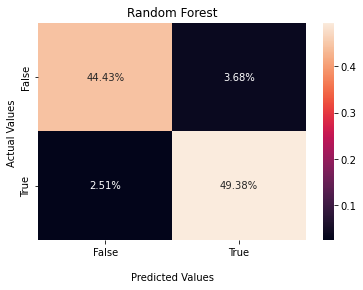

In [12]:
cf_random = confusion_matrix(test_y, random_forest_prediction)
cf_random = sns.heatmap(cf_random/np.sum(cf_random), annot=True, fmt='.2%')

cf_random.set_title('Random Forest')
cf_random.set_xlabel('\nPredicted Values')
cf_random.set_ylabel('Actual Values ')

cf_random.xaxis.set_ticklabels(['False','True'])
cf_random.yaxis.set_ticklabels(['False','True'])

plt.show()


In [13]:
accuracy_score(test_y, random_forest_prediction) 

0.9380804953560371

Naive Bayes

In [14]:
from sklearn.naive_bayes import MultinomialNB

NB_model = MultinomialNB()
NB_model.fit(text_bow_train, train_y)

MultinomialNB()

In [15]:
NB_prediction = NB_model.predict(text_bow_test)

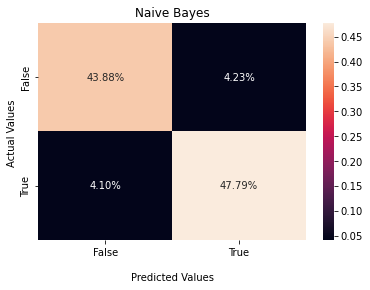

In [16]:
cf_NB = confusion_matrix(test_y, NB_prediction)
cf_NB = sns.heatmap(cf_NB/np.sum(cf_NB), annot=True, fmt='.2%')

cf_NB.set_title('Naive Bayes');
cf_NB.set_xlabel('\nPredicted Values')
cf_NB.set_ylabel('Actual Values ');

cf_NB.xaxis.set_ticklabels(['False','True'])
cf_NB.yaxis.set_ticklabels(['False','True'])

plt.show()

In [17]:
accuracy_score(test_y, NB_prediction) 

0.9166397116584262

SVM

In [18]:
from sklearn.svm import SVC

SVM_model = SVC()
SVM_model.fit(text_bow_train, train_y)

SVC()

In [19]:
SVM_prediction = SVM_model.predict(text_bow_test)

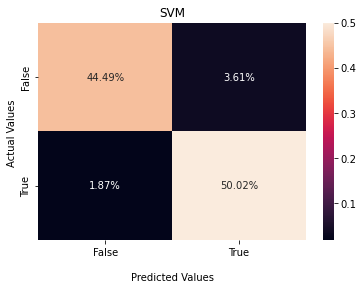

In [20]:
cf_SVM = confusion_matrix(test_y, SVM_prediction)
cf_SVM = sns.heatmap(cf_SVM/np.sum(cf_SVM), annot=True, fmt='.2%')

cf_SVM.set_title('SVM');
cf_SVM.set_xlabel('\nPredicted Values')
cf_SVM.set_ylabel('Actual Values ');

cf_SVM.xaxis.set_ticklabels(['False','True'])
cf_SVM.yaxis.set_ticklabels(['False','True'])

plt.show()

In [21]:
accuracy_score(test_y, SVM_prediction) 

0.9451504089459821

Decision Tree

In [22]:
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier()
tree_model.fit(text_bow_train,train_y)

DecisionTreeClassifier()

In [23]:
tree_prediction = tree_model.predict(text_bow_test)

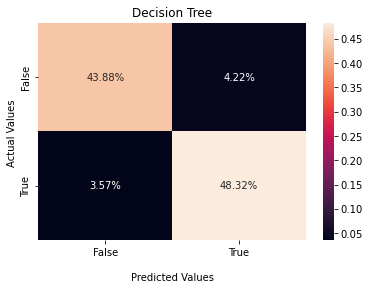

In [24]:
cf_tree = confusion_matrix(test_y, tree_prediction)
cf_tree = sns.heatmap(cf_tree/np.sum(cf_tree), annot=True, fmt='.2%')

cf_tree.set_title('Decision Tree');
cf_tree.set_xlabel('\nPredicted Values')
cf_tree.set_ylabel('Actual Values ');

cf_tree.xaxis.set_ticklabels(['False','True'])
cf_tree.yaxis.set_ticklabels(['False','True'])

plt.show()

In [25]:
accuracy_score(test_y, tree_prediction) 

0.9220461161683841

XGBoost

In [26]:
from xgboost import XGBClassifier

XG_model = XGBClassifier()
XG_model.fit(text_bow_train, train_y)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [27]:
XG_prediction = XG_model.predict(text_bow_test)

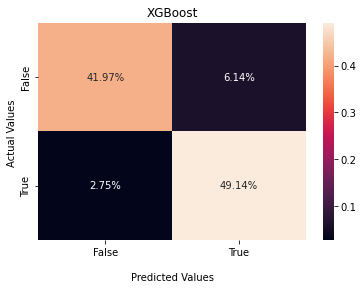

In [28]:
cf_XG = confusion_matrix(test_y, XG_prediction)
cf_XG = sns.heatmap(cf_XG/np.sum(cf_XG), annot=True, fmt='.2%')

cf_XG.set_title('XGBoost')
cf_XG.set_xlabel('\nPredicted Values')
cf_XG.set_ylabel('Actual Values ')

cf_XG.xaxis.set_ticklabels(['False','True'])
cf_XG.yaxis.set_ticklabels(['False','True'])

plt.show()

In [29]:
accuracy_score(test_y, XG_prediction) 

0.9110484728062475

KNN

In [30]:
from sklearn.neighbors import KNeighborsClassifier 
KNN_model = KNeighborsClassifier(n_neighbors=1 )  
KNN_model.fit(text_bow_train, train_y)  

KNeighborsClassifier(n_neighbors=1)

In [31]:
KNN_prediction = KNN_model.predict(text_bow_test)

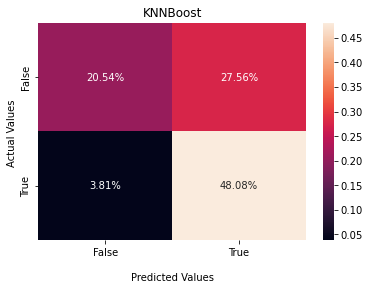

In [32]:
cf_KNN = confusion_matrix(test_y, KNN_prediction)
cf_KNN = sns.heatmap(cf_KNN/np.sum(cf_KNN), annot=True, fmt='.2%')

cf_KNN.set_title('KNNBoost')
cf_KNN.set_xlabel('\nPredicted Values')
cf_KNN.set_ylabel('Actual Values ')

cf_KNN.xaxis.set_ticklabels(['False','True'])
cf_KNN.yaxis.set_ticklabels(['False','True'])

plt.show()

In [33]:
models = ['Random Forest','Naive Bayes','SVM','Decision Tree','XGBoost','KNN']
accuracy = []

accuracy.append(accuracy_score(test_y, random_forest_prediction))
accuracy.append(accuracy_score(test_y, NB_prediction))
accuracy.append(accuracy_score(test_y, SVM_prediction)) 
accuracy.append(accuracy_score(test_y, tree_prediction)) 
accuracy.append(accuracy_score(test_y, XG_prediction)) 
accuracy.append(accuracy_score(test_y, KNN_prediction)) 

In [34]:
print(accuracy)

[0.9380804953560371, 0.9166397116584262, 0.9451504089459821, 0.9220461161683841, 0.9110484728062475, 0.6862437040802181]


/Users/aviral/miniforge3/envs/tensorflow/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


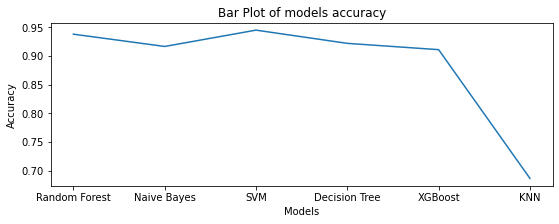

In [35]:
plt.figure(figsize=(9, 3))
sns.lineplot(models,accuracy)
plt.xlabel('Models')
plt.ylabel("Accuracy")
plt.title('Bar Plot of models accuracy')
plt.show()

/Users/aviral/miniforge3/envs/tensorflow/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


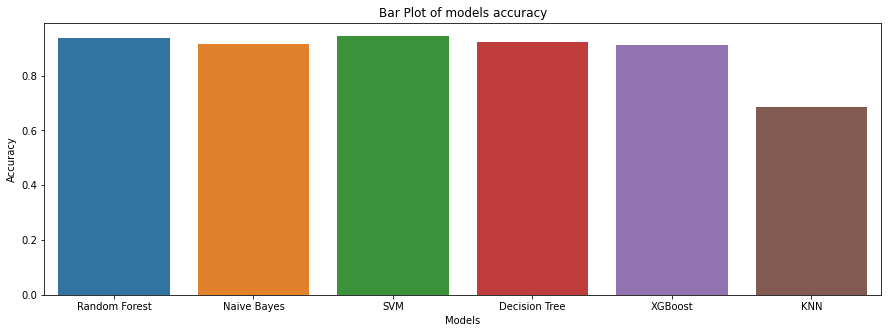

In [36]:
plt.figure(figsize=(15, 5))
sns.barplot(models,accuracy)
plt.xlabel('Models')
plt.ylabel("Accuracy")
plt.title('Bar Plot of models accuracy')
plt.show()

In [37]:
'''import tensorflow as tf

vocab_size = 500
embedding_dim = 16
max_length = 50

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])'''

"import tensorflow as tf\n\nvocab_size = 500\nembedding_dim = 16\nmax_length = 50\n\nmodel = tf.keras.Sequential([\n    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),\n    tf.keras.layers.GlobalAveragePooling1D(),\n    tf.keras.layers.Dense(6, activation='relu'),\n    tf.keras.layers.Dense(1, activation='sigmoid')\n])\nmodel.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])"

In [38]:
from sklearn.svm import NuSVC
model1 = NuSVC()  
model1.fit(text_bow_train, train_y)  

model1 = model1.predict(text_bow_test)

print(accuracy_score(test_y, model1))

0.9280070237050044


In [46]:
from sklearn.ensemble import AdaBoostClassifier

model4 = AdaBoostClassifier()  
model4.fit(text_bow_train, train_y)  

model4 = model4.predict(text_bow_test)

print(accuracy_score(test_y, model4))

0.8246846264035858


In [45]:
from sklearn.ensemble import ExtraTreesClassifier

model5 = ExtraTreesClassifier()  
model5.fit(text_bow_train, train_y)  

model5 = model5.predict(text_bow_test)

print(accuracy_score(test_y, model5))

0.9426551453260016


In [44]:
from sklearn.naive_bayes import BernoulliNB

model6 = BernoulliNB()  
model6.fit(text_bow_train, train_y)  

model6 = model6.predict(text_bow_test)

print(accuracy_score(test_y, model6))

0.904117184972968


In [43]:
from sklearn.linear_model import SGDClassifier

model7 = SGDClassifier()  
model7.fit(text_bow_train, train_y)  

model7 = model7.predict(text_bow_test)

print(accuracy_score(test_y, model7))

0.9412688877593457


In [41]:
from sklearn.linear_model import RidgeClassifier

model9 = RidgeClassifier()  
model9.fit(text_bow_train, train_y)  

model9 = model9.predict(text_bow_test)

print(accuracy_score(test_y, model9))

0.9370176978882676


In [40]:
from sklearn.linear_model import Perceptron

model10 = Perceptron()  
model10.fit(text_bow_train, train_y)  

model10 = model10.predict(text_bow_test)

print(accuracy_score(test_y, model10))

0.9326740908460792
